In [2]:
#import statements
import numpy as np
from scipy.stats import mode
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

#helper functions file
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces, visualize_knn_boundary


print('python version %s' % sys.version.split(' ')[0])

python version 3.9.12


<IPython.core.display.Javascript object>


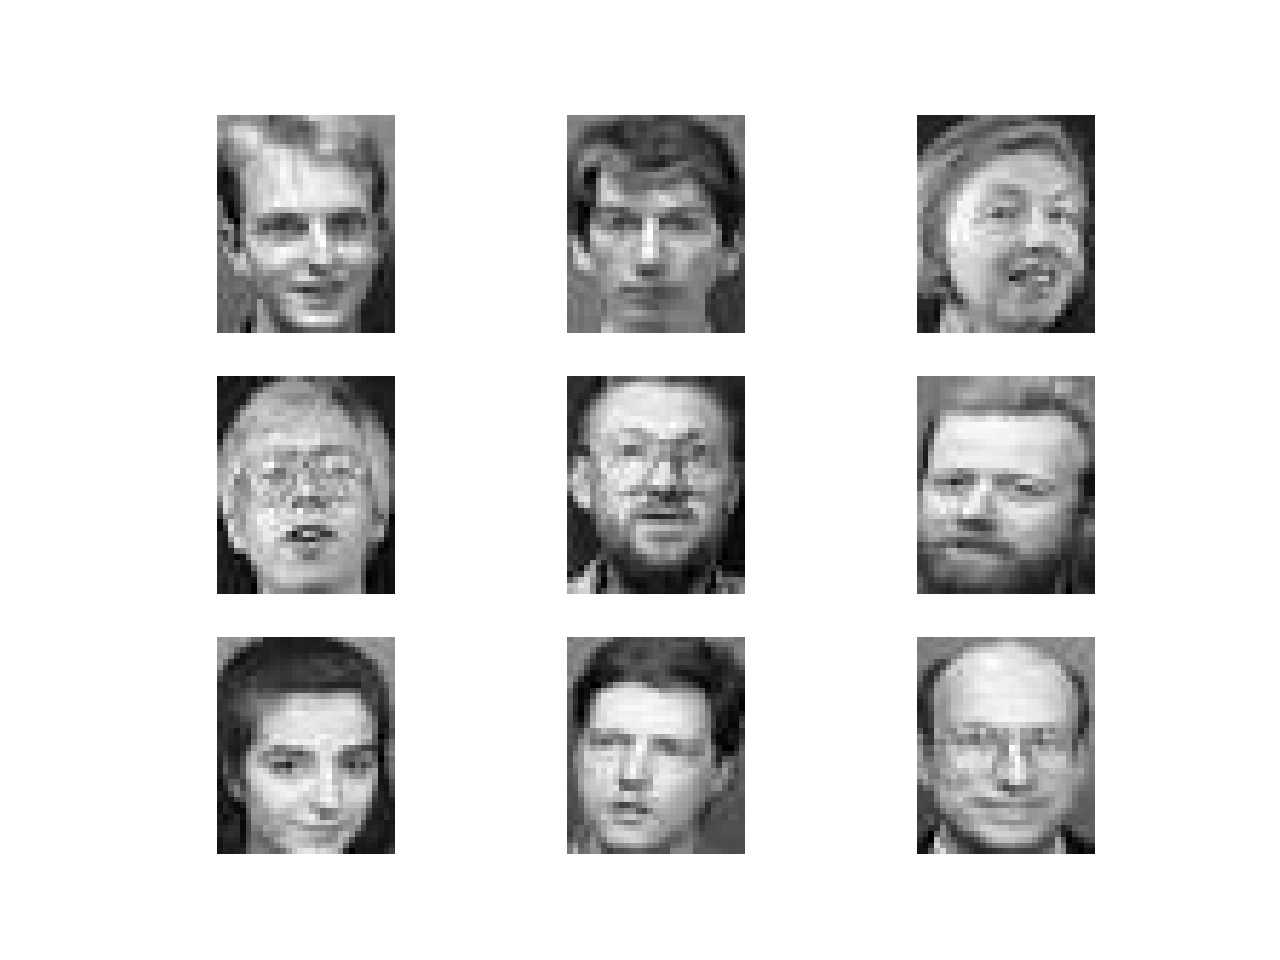

In [3]:
"""
Test loaddate function (given to us)
"""
xTr,yTr,xTe,yTe=loaddata("faces.mat")

plt.figure()
plotfaces(xTr[:9, :])

In [4]:
"""
Implement Euclidean distance function -- write specifications
"""

def l2distance(X,Z=None):
    """
    function D=l2distance(X,Z)
    
    Computes the Euclidean distance matrix.
    Syntax:
    D=l2distance(X,Z)
    Input:
    X: nxd data matrix with n vectors (rows) of dimensionality d
    Z: mxd data matrix with m vectors (rows) of dimensionality d
    
    Output:
    Matrix D of size nxm
    D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    
    call with only one input:
    l2distance(X)=l2distance(X,X)
    """

    if Z is None:
        Z=X;

    n,d1=X.shape
    m,d2=Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"

    S = np.tile(np.diag(X @ X.transpose()).transpose(), (m, 1)).T
    R = np.tile(np.diag(Z @ Z.transpose()), (n, 1))
    D = S + R - 2 * np.dot(X, Z.transpose())
    D = np.sqrt(np.maximum(D,0))
    return D

In [6]:
"""
Implement the function findknn, which should find the k nearest neighbors of a set of vectors within a given training data set. Break ties arbitrarily. The call of 
"""
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """

    n, d = xTr.shape
    m, d = xTe.shape
    
    dist_matrix = l2distance(xTr, xTe)
    
    indices = np.argsort(dist_matrix, axis=0)[:k, :]

    dists = np.take_along_axis(dist_matrix, indices, axis=0)

    return indices, dists
  

<IPython.core.display.Javascript object>


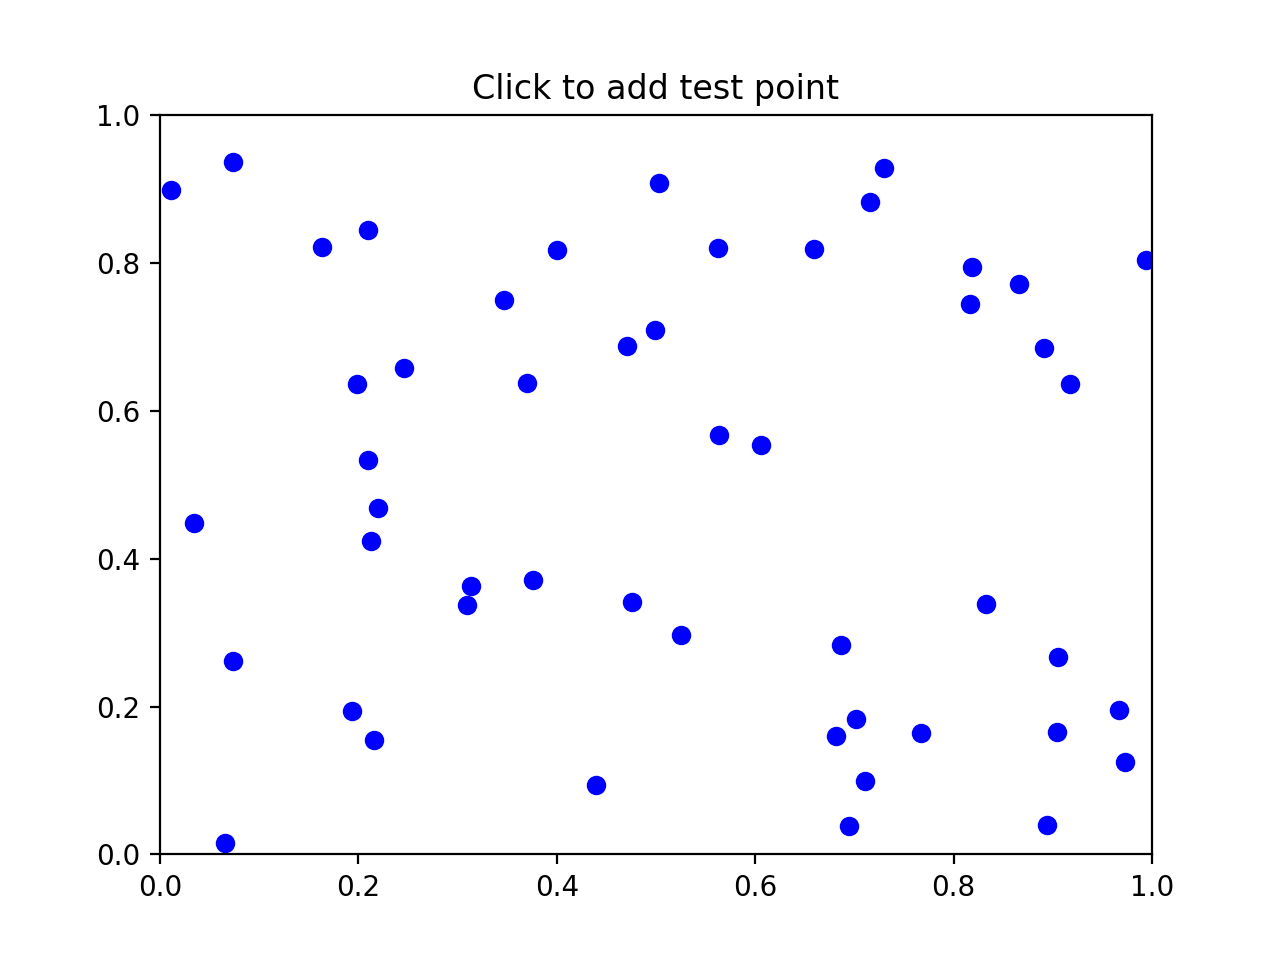

In [10]:
"""
Test implementation
"""
visualize_knn_2D(findknn)

In [12]:
"""
Now implement a k-NN classifier
"""
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = 1xd vector of predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    dists = l2distance(xTr, xTe)

    indices, dists = findknn(xTr, xTe, k)
    m = xTe.shape[0]
    preds = []
    for i in range(m):
        neighbor_labels = yTr[indices[:, i]]

        unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
        majority_class = unique_labels[np.argmax(counts)]

        preds.append(majority_class)

    return np.array(preds)

In [14]:
"""
Helper function to test -- finds absolute loss 
"""
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind=
        'acc' accuracy, or 
        'abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        output = 0
        for i in range(len(truth)):
            output += abs(truth[i] - preds[i])
        output /= len(truth)
    elif kind == 'acc':
        output = 0
        for i in range(len(truth)):
            if truth[i] == preds[i]:
                output += 1
        output /= len(truth)
    
    return output

In [15]:
"""
Run classifier on test script
"""
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0162 seconds

